In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from functions import *
import pandas as pd
from string import ascii_lowercase
from joblib import Parallel, delayed
from scipy.optimize import curve_fit, fsolve
from collections import Counter
from params import *

path = "Data"
path = "/home/matheus/Pesquisa/DriftMap/Data"

def func(x, b, const):
    return const * (x**b)

def format_number(x, decimal_places=10):
    formatted = f"{x:.{decimal_places}f}"
    if formatted.startswith('0'):
        formatted = formatted[1:]
    elif formatted.startswith("-0"):
        formatted = formatted[0] + formatted[2:]
    return formatted

def extract_grid(datafile):
    df = pd.read_csv(datafile, header=None, delim_whitespace=True)
    x = np.array(df[0])
    y = np.array(df[1])
    z = np.array(df[2])
    M = int(np.sqrt(len(x)))
    x = x.reshape((M, M))
    y = y.reshape((M, M))
    z = z.reshape((M, M))

    return x, y, z

# Fig 1

## Fixed points

### $\beta = 1.0\times10^{-3}$

In [2]:
eps = 1e-3
N = int(2e4)
x = 0.5
y = 1e-10
np.random.seed(12)
n_ic = int(750/4)
x = np.random.uniform(0, 1, n_ic)
y = np.random.uniform(-1e-3, 1e-3, n_ic)
u = np.array(Parallel(n_jobs=-1)(delayed(time_series)(x[i], y[i], eps, N) for i in range(n_ic)))
u = u.reshape((n_ic*(N + 1), 2))

In [7]:
# negative roots
ms = np.arange(1, -10, -1)
negative_root1 = np.zeros((ms.shape[0], 2))
for l, m in enumerate(ms):
    thetas = (m/2) % 1
    guesses = np.linspace(-0.05, -1e-5, 100)
    Is = np.zeros_like(guesses)
    for j, guess in enumerate(guesses):
        root = fsolve(fixed_points, guess, m)[0]
        Is[j] = root
    Is = np.array(list(set(Is)))
    negative_root1[l, 0] = Is[np.where(Is < 0)].mean()
    negative_root1[l, 1] = Is[np.where(Is < 0)].std()

In [8]:
# positive roots
ms = np.arange(-4, -13, -1)
positive_root1 = np.zeros((ms.shape[0], 2))
for l, m in enumerate(ms):
    thetas = (m/2) % 1
    guesses = np.linspace(1e-5, 0.05, 100)
    Is = np.zeros_like(guesses)
    for j, guess in enumerate(guesses):
        root = fsolve(fixed_points, guess, m)[0]
        Is[j] = root
    Is = np.array(list(set(Is)))
    positive_root1[l, 0] = Is[np.where(Is > 0)].mean()
    positive_root1[l, 1] = Is[np.where(Is > 0)].std()

(0.01, 0.025)

<Figure size 640x480 with 0 Axes>

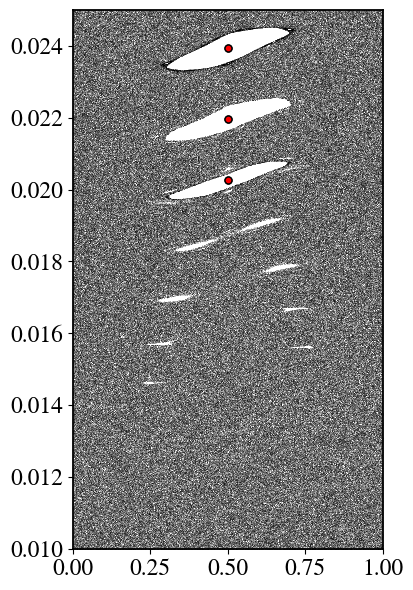

In [9]:
plot_params()
fig, ax = plt.subplots(figsize=(4, 7))
plt.plot(u[:, 0], u[:, 1], "ko", markersize=0.25, markeredgewidth=0)
plt.xlim(0, 1)
plt.ylim(u[:, 1].min(), u[:, 1].max())

plt.plot(0.5*np.ones_like(positive_root1), positive_root1[:, 0], "ro", markersize=5, markeredgecolor="k")
#plt.plot(np.zeros_like(negative_root1), negative_root1[:, 0], "ro", markersize=5, markeredgecolor="k", clip_on=False, alpha=1, zorder=10)
    #plt.plot(1, negative_root, "ro", markersize=5, markeredgecolor="k")
plt.ylim(0.01, 0.025)

### $\beta = 2.0\times10^{-3}$

In [10]:
eps = 2e-3
N = int(2e6)
x = 0.5
y = 1e-10
u = time_series(x, y, eps, N)

In [11]:
# negative roots
ms = np.arange(6, -4, -1)
negative_root2 = np.zeros((ms.shape[0], 2))
for l, m in enumerate(ms):
    thetas = (m/2) % 1
    guesses = np.linspace(-0.05, -1e-5, 100)
    Is = np.zeros_like(guesses)
    for j, guess in enumerate(guesses):
        root = fsolve(fixed_points, guess, m)[0]
        Is[j] = root
    Is = np.array(list(set(Is)))
    negative_root2[l, 0] = Is[np.where(Is < 0)].mean()
    negative_root2[l, 1] = Is[np.where(Is < 0)].std()

In [12]:
# positive roots
ms = np.arange(-1, -8, -1)
positive_root2 = np.zeros((ms.shape[0], 2))
for l, m in enumerate(ms):
    thetas = (m/2) % 1
    guesses = np.linspace(1e-5, 0.05, 100)
    Is = np.zeros_like(guesses)
    for j, guess in enumerate(guesses):
        root = fsolve(fixed_points, guess, m)[0]
        Is[j] = root
    Is = np.array(list(set(Is)))
    positive_root2[l, 0] = Is[np.where(Is > 0)].mean()
    positive_root2[l, 1] = Is[np.where(Is > 0)].std()

(0.02, 0.04)

<Figure size 640x480 with 0 Axes>

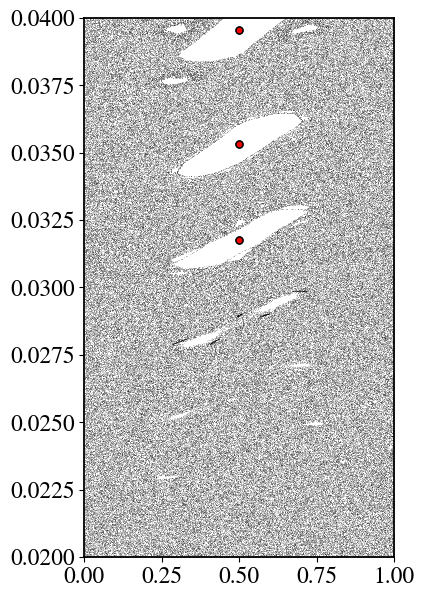

In [14]:
plot_params()
fig, ax = plt.subplots(figsize=(4, 7))
plt.plot(u[:, 0], u[:, 1], "ko", markersize=0.25, markeredgewidth=0)
plt.xlim(0, 1)
plt.ylim(u[:, 1].min(), u[:, 1].max())

plt.plot(0.5*np.ones_like(positive_root2), positive_root2[:, 0], "ro", markersize=5, markeredgecolor="k")
plt.plot(np.zeros_like(negative_root2), negative_root2[:, 0], "ro", markersize=5, markeredgecolor="k", alpha=1, zorder=10)
    #plt.plot(1, negative_root, "ro", markersize=5, markeredgecolor="k")
plt.ylim(0.02, 0.04)
#plt.ylim(-0.15,0 )

### $\beta = 3.0\times10^{-3}$

In [15]:
eps = 3e-3
N = int(2e6)
x = 0.5
y = 1e-10
u = time_series(x, y, eps, N)

In [16]:
# negative roots
ms = np.arange(8, -1, -1)
negative_root3 = np.zeros((ms.shape[0], 2))
for l, m in enumerate(ms):
    thetas = (m/2) % 1
    guesses = np.linspace(-0.05, -1e-5, 100)
    Is = np.zeros_like(guesses)
    for j, guess in enumerate(guesses):
        root = fsolve(fixed_points, guess, m)[0]
        Is[j] = root
    Is = np.array(list(set(Is)))
    negative_root3[l, 0] = Is[np.where(Is < 0)].mean()
    negative_root3[l, 1] = Is[np.where(Is < 0)].std()

In [17]:
# positive roots
ms = np.arange(0, -6, -1)
positive_root3 = np.zeros((ms.shape[0], 2))
for l, m in enumerate(ms):
    thetas = (m/2) % 1
    guesses = np.linspace(1e-5, 0.05, 100)
    Is = np.zeros_like(guesses)
    for j, guess in enumerate(guesses):
        root = fsolve(fixed_points, guess, m)[0]
        Is[j] = root
    Is = np.array(list(set(Is)))
    positive_root3[l, 0] = Is[np.where(Is > 0)].mean()
    positive_root3[l, 1] = Is[np.where(Is > 0)].std()

(-0.15, 0.1)

<Figure size 640x480 with 0 Axes>

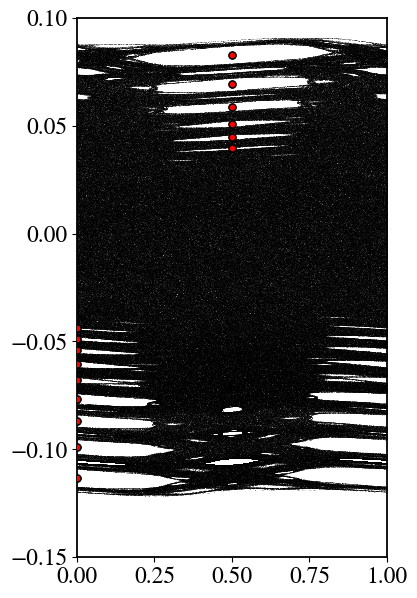

In [18]:
plot_params()
fig, ax = plt.subplots(figsize=(4, 7))
plt.plot(u[:, 0], u[:, 1], "ko", markersize=0.25, markeredgewidth=0)
plt.xlim(0, 1)
plt.ylim(u[:, 1].min(), u[:, 1].max())

plt.plot(0.5*np.ones_like(positive_root3), positive_root3[:, 0], "ro", markersize=5, markeredgecolor="k")
plt.plot(np.zeros_like(negative_root3), negative_root3[:, 0], "ro", markersize=5, markeredgecolor="k", alpha=1, zorder=10)
    #plt.plot(1, negative_root, "ro", markersize=5, markeredgecolor="k")
plt.ylim(-0.15, 0.1)


## Create the plot

0.001
0.002
0.003


<Figure size 640x480 with 0 Axes>

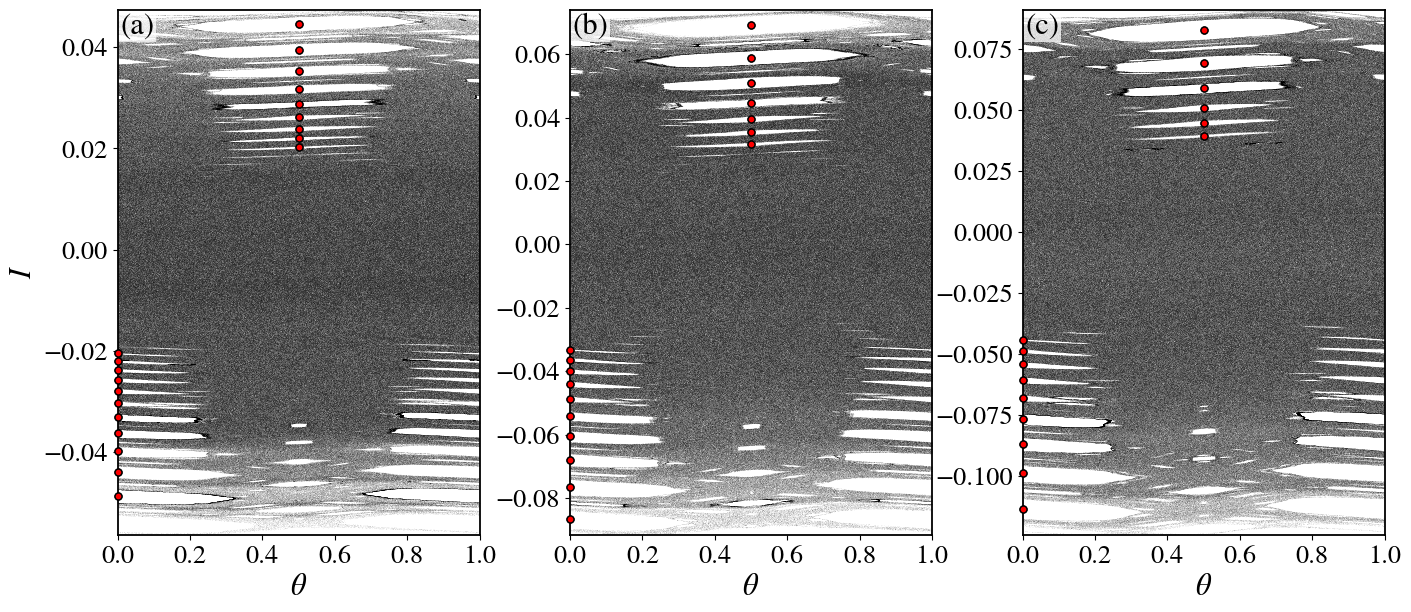

In [24]:
plot_params(fontsize=22, axes_linewidth=1.3)
fig, ax = plt.subplots(1, 3, sharex=True, figsize=(14, 6))
xbox = 0.007425
ybox = 0.9554
bbox = {'linewidth': 0.0, 'facecolor': 'w', 'alpha': 0.75, 'pad': 1}
ms = 5
N = int(2e4)
epss = np.array([1e-3, 2e-3, 3e-3])
Ilim = 1e-3*np.ones_like(epss)
Ilim = 0.01*np.ones(3)
for j, eps in enumerate(epss):
    np.random.seed(12)
    print(eps)
    n_ic = 210
    x = np.random.uniform(0, 1, n_ic)
    y = np.random.uniform(-Ilim[j], Ilim[j], n_ic)
    #y = np.ones(n_ic)*1e-16
    u = np.array(Parallel(n_jobs=-1)(delayed(time_series)(x[i], y[i], eps, N) for i in range(n_ic)))
    u = u.reshape((n_ic*(N + 1), 2))
    ax[j].plot(u[:, 0], u[:, 1], "ko", markersize=0.1, markeredgewidth=0)
    ax[j].set_xlabel("$\\theta$")
    ax[j].text(xbox, ybox, "(%s)" % (ascii_lowercase[j]), transform=ax[j].transAxes, bbox=bbox)
    ax[j].set_ylim(u[:, 1].min(), u[:, 1].max())
#ax[0].set_ylim(0, 0.025)
ax[0].plot(0.5*np.ones_like(positive_root1), positive_root1[:, 0], "ro", markersize=ms, markeredgecolor="k")
ax[0].plot(np.zeros_like(negative_root1), negative_root1[:, 0], "ro", markersize=ms, markeredgecolor="k", clip_on=False, alpha=1, zorder=10)

ax[1].plot(0.5*np.ones_like(positive_root2), positive_root2[:, 0], "ro", markersize=ms, markeredgecolor="k")
ax[1].plot(np.zeros_like(negative_root2), negative_root2[:, 0], "ro", markersize=ms, markeredgecolor="k", clip_on=False, alpha=1, zorder=10)

ax[2].plot(0.5*np.ones_like(positive_root3), positive_root3[:, 0], "ro", markersize=ms, markeredgecolor="k")
ax[2].plot(np.zeros_like(negative_root3), negative_root3[:, 0], "ro", markersize=ms, markeredgecolor="k", clip_on=False, alpha=1, zorder=10)
plt.xlim(0, 1)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
#plt.plot([0.25, 0.75], [0.75, 0.75], "r--")
#plt.ylim(-5, #5)
ax[0].set_ylabel("$I$");
plt.subplots_adjust(left=0.08, bottom=0.105, right=0.985, top=0.98, wspace=0.25)
plt.savefig("Figures/fig1.png", dpi=300)

# Fig 2

In [26]:
n = 1000
N = int(1e8)
exponent = int(np.log10(N))
base = int(N/10**exponent)
df = "%s/lyapunov_vs_beta_N=%ie%i_n=%i.dat" % (path, base, exponent, n)
df = pd.read_csv(df, header=None, delim_whitespace=True)
beta = np.array(df[0])
lypnv = np.array(df[1])

<Figure size 640x480 with 0 Axes>

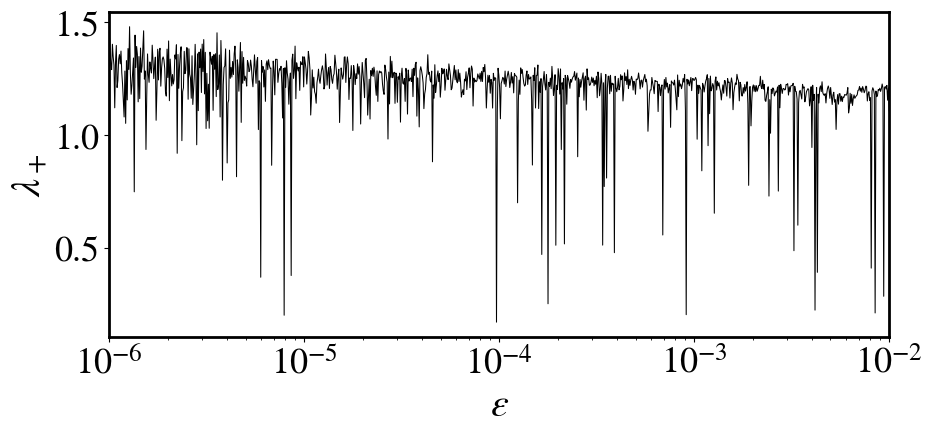

In [32]:
plot_params(fontsize=29, axes_linewidth=2)
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(beta, lypnv, "k", lw=0.75)
plt.xlim(beta.min(), beta.max())
plt.xscale("log"), plt.xlabel("$\\epsilon$"), plt.ylabel("$\\lambda_+$");
plt.tight_layout()
plt.savefig("Figures/fig2.png", dpi=300, bbox_inches="tight")

# Fig 8

In [2]:
N = int(1e6)
eN = int(np.log10(N))
bN = int(N/10**eN)
n_ic = int(1e4)
en_ic = int(np.log10(n_ic))
bn_ic = int(n_ic/10**en_ic)
I0 = np.ones(20)*1e-7

df = "%s/Irms/Isat_vs_beta_I0=1e-7_nic=1e4_N=1e8.dat" % path
df = pd.read_csv(df, header=None, delim_whitespace=True)
xsat = np.array(df[0])
ysat = np.array(df[1])

FileNotFoundError: [Errno 2] No such file or directory: '/home/matheus/Pesquisa/DriftMap/Data/Irms/Isat_vs_beta_I0=1e-7_nic=1e4_N=1e8.dat'

In [4]:
N = int(1e6)
eN = int(np.log10(N))
bN = int(N/10**eN)
n_ic = int(1e4)
en_ic = int(np.log10(n_ic))
bn_ic = int(n_ic/10**en_ic)
I0 = np.ones(20)*1e-7

step = 1
eps = np.logspace(-4, -2, 20)
i_fit_ini = np.ones_like(eps, dtype=np.int32)*10
i_fit_end = [1500, 1500, 1500, 1500, 1500, 1100, 1000,
             150, 150, 150, 100, 100, 100, 100, 100, 100,
             100, 100, 100, 100]
coeffs = np.zeros((eps.shape[0], 2))
nx = np.zeros_like(eps)
iexc = 3
for i in range(len(eps) - iexc):
    eeps = int(np.log10(eps[i]))
    beps = int(eps[i]/10**eeps)
    eI0 = int(np.floor(np.log10(I0[i])))
    bI0 = int(I0[i]/10**eI0)
    df = "%s/Irms_beta=%.5f_I0=%ie%i_nic=%ie%i_N=%ie%i.dat" % (path, eps[i], bI0, eI0, bn_ic, en_ic, bN, eN)
    df = pd.read_csv(df, header=None, delim_whitespace=True)
    time = np.array(df[0])[::step]
    Irms = np.array(df[1])[::step]
    aux_time = time[i_fit_ini[i]:i_fit_end[i]]
    aux_Irms = Irms[i_fit_ini[i]:i_fit_end[i]]
    x_fit = time[i_fit_ini[i]:i_fit_end[i]]
    y_fit = Irms[i_fit_ini[i]:i_fit_end[i]]
    popt, _ = curve_fit(func, x_fit, y_fit)
    coeffs[i, :] = popt
    print(eps[i], coeffs[i, 0])
    nx[i] = (ysat[i]/(coeffs[i, 1]))**(1/coeffs[i, 0])

9.999999999999999e-05 0.4883044458778724
0.00012742749857031334 0.48530847766105895
0.00016237767391887208 0.47665106795330536
0.000206913808111479 0.4695510736248707
0.0002636650898730358 0.4640323601235873
0.0003359818286283781 0.46680333064876506
0.00042813323987193956 0.4591062289194185
0.000545559478116852 0.48273577074399304
0.0006951927961775606 0.48356531417269166
0.0008858667904100822 0.4820060717621676
0.0011288378916846883 0.4750892441348274
0.001438449888287663 0.4841440769330088
0.0018329807108324356 0.4729738175831465
0.002335721469090121 0.4682271658504998
0.002976351441631319 0.47016140330597883
0.00379269019073225 0.4721790170408077
0.004832930238571752 0.47024040905413456


In [5]:
beta = coeffs[:-iexc, 0].mean()
std_beta = coeffs[:-iexc, 0].std()

In [11]:
beta, std_beta

(0.47476936914059614, 0.008134119566621436)

In [6]:
N = int(1e8)
eN = int(np.log10(N))
bN = int(N/10**eN)
n_ic = int(1e4)
en_ic = int(np.log10(n_ic))
bn_ic = int(n_ic/10**en_ic)

In [7]:
eps = np.logspace(-4, -2, 20)
i_fit_end = [1500, 1500, 1500, 1500, 1500, 1100, 1000,
             150, 150, 150, 100, 100, 100, 100, 100, 100,
             100, 100, 100, 100]
iplots = [0, 7, 13, 16]
eps2 = np.array([eps[i] for i in iplots])
i_fit_end_plot = [i_fit_end[i] for i in iplots]
ysat_plot = [ysat[i] for i in iplots]
beta_plot = [coeffs[i, 0] for i in iplots]
B = [coeffs[i, 1] for i in iplots]
nx_plot = [nx[i] for i in iplots]

Saving plot...


<Figure size 640x480 with 0 Axes>

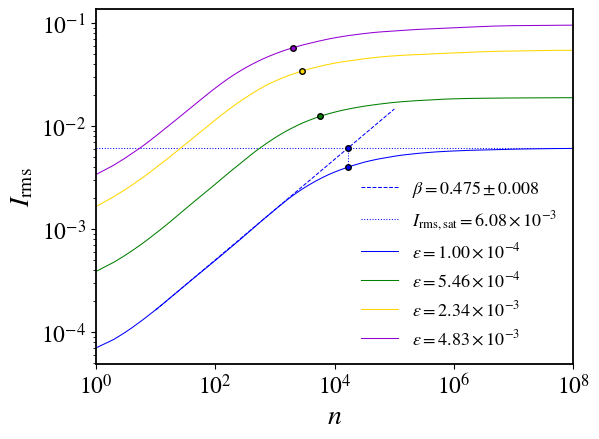

In [10]:
plot_params(fontsize=20, legend_fontsize=13)
fig, ax = plt.subplots()
colors = ["b", "g", "gold", "darkviolet"]
time = np.arange(1, N + 1)
min_sti = 100000
max_sti = -1
label = "$\\varepsilon = %i.0\\times10^{%i}$, $I_0 = %i.0\\times10^{%i}$"
step = 100
I0 = 1e-7
ms = 4
lw = 0.75

ynx = np.array([3.975e-3, 1.25e-2, 3.4e-2, 5.75e-2])
for i in range(len(eps2)):
#for i in range(3, 4):
    eeps = int(np.floor(np.log10(eps2[i])))
    beps = float(eps2[i]/10**eeps)
    eI0 = int(np.floor(np.log10(I0)))
    bI0 = int(I0/10**eI0)
    df = "%s/Irms/Irms_beta=%.5f_I0=%ie%i_nic=%ie%i_N=%ie%i_reduced.dat" % (path, eps2[i], bI0, eI0, bn_ic, en_ic, bN, eN)
    df = pd.read_csv(df, header=None, delim_whitespace=True)
    time = np.array(df[0])
    Irms = np.array(df[1])
    if i == 0:
        eIsat = int(np.floor(np.log10(ysat_plot[i])))
        bIsat = float(ysat_plot[i]/10**(eIsat))
        x_new = np.logspace(np.log10(10), np.log10(1e5), 100)
        y_new = B[i]*x_new**beta_plot[i]
        plt.plot(x_new, y_new, "--", c=colors[i], lw=lw, zorder=0, label="$\\beta = %.3f \pm %.3f$" % (beta, std_beta))
        plt.plot([1e0, N], [ysat_plot[i], ysat_plot[i]], ":", c=colors[i], lw=lw, zorder=0, label="$I_{\\mathrm{rms,sat}} = %.2f \\times 10^{%i}$" % (bIsat, eIsat))
        plt.plot(nx_plot[i], ysat_plot[i], "o", c=colors[i], markersize=ms, markeredgecolor="k", zorder=2)
        plt.plot([nx_plot[i], nx_plot[i]], [ynx[i], ysat_plot[i]], ":", c=colors[i], lw=lw, zorder=0)
    plt.plot(nx_plot[i], ynx[i], "o", c=colors[i], markersize=ms, markeredgecolor="k", zorder=2)
    plt.plot(time, Irms, lw=lw, c=colors[i], label="$\\varepsilon = %.2f\\times10^{%i}$" % (beps, eeps), zorder=1)
ax.set_xscale("log"), ax.set_yscale("log")
ax.set_xlabel("$n$"), ax.set_ylabel("$I_{\\mathrm{rms}}$")
ax.legend(loc="lower right", frameon=False)
ax.set_xlim(1e0, N)
plt.tight_layout()
print("Saving plot...")
plt.savefig("Figures/fig7.png", dpi=300, bbox_inches="tight")

# Fig 3

<Figure size 640x480 with 0 Axes>

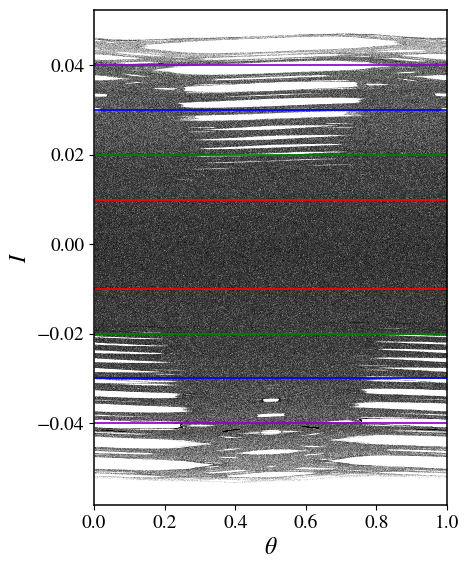

In [23]:
plot_params(fontsize=17, axes_linewidth=1.1)
fig, ax = plt.subplots(figsize=(5, 6))
N = int(2e4)
eps = 1e-3
np.random.seed(12)
n_ic = 210
x = np.random.uniform(0, 1, n_ic)
y = np.random.uniform(-0.001, 0.001, n_ic)
#y = np.ones(n_ic)*1e-16
for i in range(n_ic):
    u = time_series(x[i], y[i], eps, N)
    plt.plot(u[:, 0], u[:, 1], "ko", markersize=0.1, markeredgewidth=0)
plt.xlim(0, 1)
Ls = [0.01, 0.02, 0.03, 0.04]
colors = ["red", "green", "blue", "darkviolet"]
for i, L in enumerate(Ls):
    plt.plot([0, 1], [L, L], "-", c=colors[i], lw=1.25)
    plt.plot([0, 1], [-L, -L], "-", c=colors[i], lw=1.25)
plt.xlabel("$\\theta$"), plt.ylabel("$I$");
plt.tight_layout()
plt.savefig("Figures/fig3.png", dpi=300, bbox_inches="tight")

# Fig 5

<Figure size 640x480 with 0 Axes>

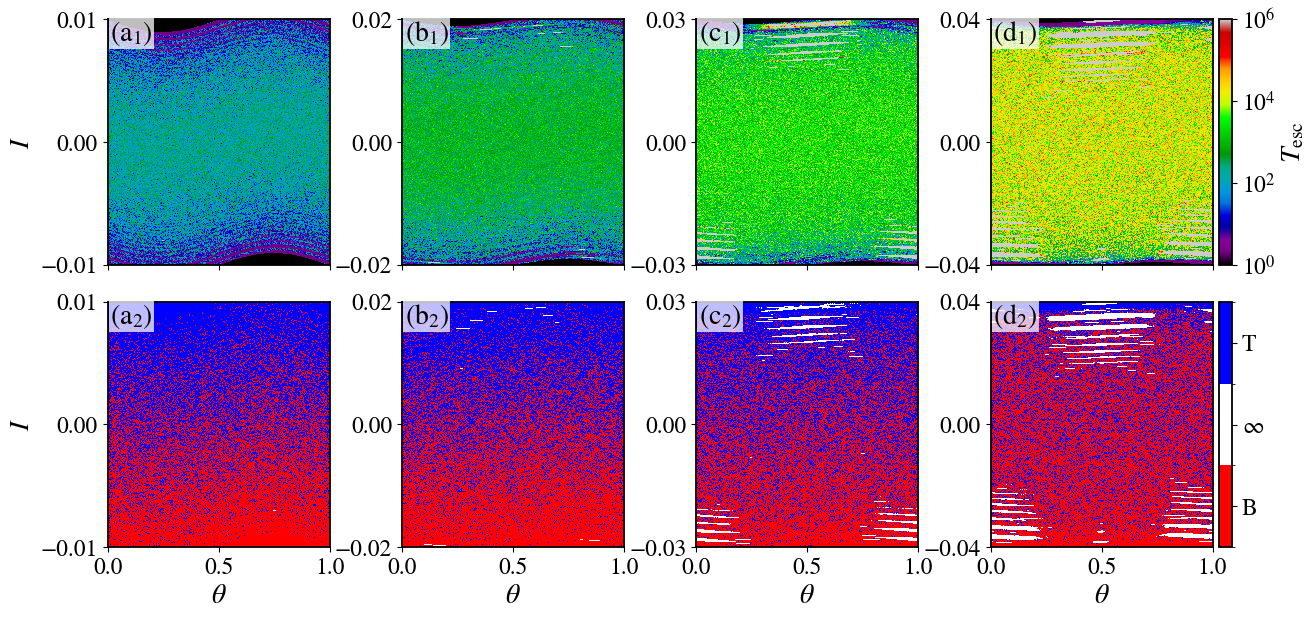

In [3]:
plot_params()
fig, ax = plt.subplots(2, 4, sharex=True, figsize=(13, 6))

beta = 1e-3
I_escs = [0.01, 0.02, 0.03, 0.04]
grid = 1080
colors = ["red", "white", "blue"]
values = [-1.5, -0.5, 0.5, 1.5]
ticks = [-1, 0, 1]
tick_labels = ["B", "$\\infty$", "T"]
cmap = mpl.colors.ListedColormap(colors)
norm = mpl.colors.BoundaryNorm(values, cmap.N)
xbox = 0.0115
ybox = 0.9125
bbox = {'linewidth': 0.0, 'facecolor': 'white', 'alpha': 0.75, 'pad': 1}
for i, I_esc in enumerate(I_escs):

    df = "%s/escape_times_beta=%.5f_Iesc=%.2f_grid=%i.dat" % (path, beta, I_esc, grid)
    df = pd.read_csv(df, header=None, delim_whitespace=True)
    x = np.array(df[0])
    y = np.array(df[1])
    esc_time = np.array(df[2])
    esc_side = np.array(df[3])
    N = int(np.sqrt(len(x)))
    x = x.reshape((N, N))
    y = y.reshape((N, N))
    esc_time = esc_time.reshape((N, N))
    esc_side = esc_side.reshape((N, N))
    hm1 = ax[0, i].pcolor(x, y, esc_time, cmap="nipy_spectral", norm=mpl.colors.LogNorm(vmin=1e0, vmax=1e6))
    hm2 = ax[1, i].pcolor(x, y, esc_side, cmap=cmap, norm=norm)
    ax[0, i].set_ylim(-I_esc, I_esc)
    ax[1, i].set_ylim(-I_esc, I_esc)
    ax[0, i].set_yticks([-I_esc, 0, I_esc])
    ax[1, i].set_yticks([-I_esc, 0, I_esc])
    ax[0, i].text(xbox, ybox, "(%s$_1$)" % (ascii_lowercase[i]), transform=ax[0, i].transAxes, bbox=bbox)
    ax[1, i].text(xbox, ybox, "(%s$_2$)" % (ascii_lowercase[i]), transform=ax[1, i].transAxes, bbox=bbox)
ax[0, 0].set_xticks([0, 0.5, 1])
[ax[-1, i].set_xlabel("$\\theta$") for i in range(4)]
[ax[i, 0].set_ylabel("$I$") for i in range(2)]

cbar_ax = fig.add_axes([0.935, 0.571, 0.01, 0.409])
cbar = fig.colorbar(hm1, cax=cbar_ax, label="$T_{\\mathrm{esc}}$")

cbar_ax = fig.add_axes([0.935, 0.1, 0.01, 0.409])
cbar = fig.colorbar(hm2, cax=cbar_ax, ticks=ticks)
cbar.ax.set_yticklabels(tick_labels)
plt.subplots_adjust(left=0.08, bottom=0.1, right=0.93, top=0.98, hspace=0.15, wspace=0.325)
plt.savefig("Figures/fig5.png", dpi=300)

In [15]:
beta = 1e-3
I_escs = [0.01, 0.02, 0.03, 0.04]
grid = 1080
for i, I_esc in enumerate(I_escs):

    df = "%s/escape_times_beta=%.5f_Iesc=%.2f_grid=%i.dat" % (path, beta, I_esc, grid)
    df = pd.read_csv(df, header=None, delim_whitespace=True)
    x = np.array(df[0])
    y = np.array(df[1])
    esc_time = np.array(df[2])
    esc_side = np.array(df[3])
    counter = Counter(esc_side)
    print("(%s$_2$) & %.6f & %.6f & %.6f & %.6f \\\\" % (ascii_lowercase[i], counter[-1]/len(esc_side), counter[1]/len(esc_side), counter[0]/len(esc_side), (counter[-1]/len(esc_side))/(counter[1]/len(esc_side))))#, counter[1]/len(esc_side) + counter[0]/len(esc_side) + counter[-1]/len(esc_side))

(a$_2$) & 0.498364 & 0.501601 & 0.000035 & 0.993548 \\
(b$_2$) & 0.513745 & 0.484148 & 0.002107 & 1.061132 \\
(c$_2$) & 0.502372 & 0.467406 & 0.030222 & 1.074810 \\
(d$_2$) & 0.606776 & 0.327269 & 0.065954 & 1.854058 \\


# Fig 6

<Figure size 640x480 with 0 Axes>

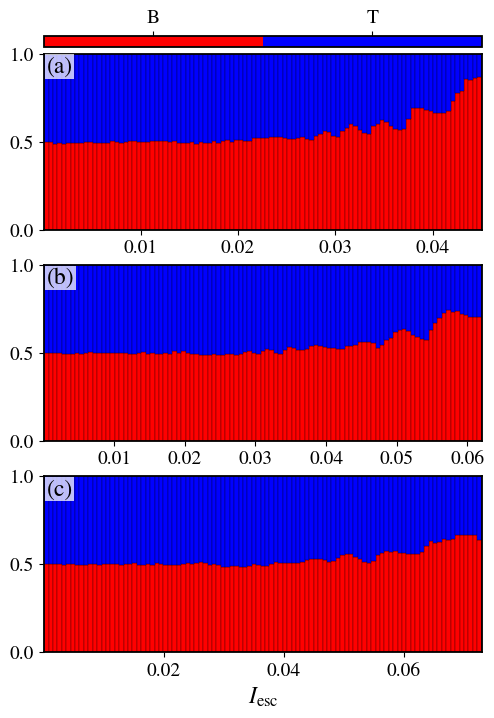

In [52]:
plot_params(fontsize=17)
fig, ax = plt.subplots(3, 1, sharey=True, figsize=(5, 7))

beta = 1e-3
betas = [1e-3, 2e-3, 3e-3]
ctop = "blue"
cbottom = "red"
colors = [cbottom, ctop]
values = [-1, 0, 1]
cmap = mpl.colors.ListedColormap(colors)
norm = mpl.colors.BoundaryNorm(values, cmap.N)
lw = 0.2
xbox = 0.006
ybox = 0.895
bbox = {'linewidth': 0.0, 'facecolor': 'white', 'alpha': 0.75, 'pad': 1}
for j, beta in enumerate(betas):

    df = "%s/escape_side_ratio_beta=%.5f_dI=1e-10_nic=1e5_nIesc=100.dat" % (path, beta)
    df = pd.read_csv(df, header=None, delim_whitespace=True)
    I_esc = np.array(df[0])
    width = I_esc[1] - I_esc[0]
    top = np.array(df[1])
    bottom = np.array(df[3])
    b_top = bottom

    ax[j].bar(I_esc, bottom, width=width, align="edge", color=cbottom, edgecolor="black", linewidth=lw)
    ax[j].bar(I_esc, top, width=width, align="edge", color=ctop, edgecolor="black", bottom=b_top, linewidth=lw)
    ax[j].text(xbox, ybox, "(%s)" % (ascii_lowercase[j]), transform=ax[j].transAxes, bbox=bbox)
    ax[j].set_xlim(I_esc.min(), I_esc.max())
    #ax[j].set_ylabel("Ratio")
ax[0].set_xticks([0.001])    
plt.ylim(0, 1)
plt.yticks([0, 0.5, 1])
ax[-1].set_xlabel("$I_{\\mathrm{esc}}$")
cbar_ax = fig.add_axes([0.075, 0.945, 0.95-0.075, 0.015])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ticks=[-0.5, 0.5], cax=cbar_ax, orientation="horizontal")
cbar.ax.set_xticklabels(["B", "T"])
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')
cbar.ax.minorticks_off()
plt.subplots_adjust(left=0.075, bottom=0.08, right=0.95, top=0.935, hspace=0.2)
plt.savefig("Figures/fig6.png", dpi=500)

# Fig 4

In [2]:
eps = 1e-3
N = int(2e4)
x = 0.5
y = 1e-10
np.random.seed(12)
n_ic = int(750/2)
x = np.random.uniform(0, 1, n_ic)
y = np.random.uniform(-1e-3, 1e-3, n_ic)
#y = np.ones(n_ic)*1e-16
u = np.array(Parallel(n_jobs=-1)(delayed(time_series)(x[i], y[i], eps, N) for i in range(n_ic)))
u = u.reshape((n_ic*(N + 1), 2))
# positive roots
ms = np.arange(-4, -13, -1)
positive_root1 = np.zeros((ms.shape[0], 2))
for l, m in enumerate(ms):
    thetas = (m/2) % 1
    guesses = np.linspace(1e-5, 0.05, 100)
    Is = np.zeros_like(guesses)
    for j, guess in enumerate(guesses):
        root = fsolve(fixed_points, guess, m)[0]
        Is[j] = root
    Is = np.array(list(set(Is)))
    positive_root1[l, 0] = Is[np.where(Is > 0)].mean()
    positive_root1[l, 1] = Is[np.where(Is > 0)].std()
Ifii = positive_root1[:, 0].min()
Ifii

0.02026073030486245

In [3]:
I_escs = np.logspace(np.log10(1e-3), np.log10(4e-2), 100)
beta = 1e-3
nic = int(1e6)
exponent = int(np.log10(nic))
base = int(nic/10**exponent)

In [4]:
colors = ["black", "red", "blue", "green", "darkviolet", "gold", "cyan", "grey"]
lw = 0.75
#I_escs = np.array([0.01])
a = np.zeros_like(I_escs)
b = np.zeros_like(I_escs)
for i, I_esc in enumerate(I_escs):
    df = "%s/survival_probability_eps=%.5f_Iesc=%.10f_nic=%ie%i.dat" % (path, beta, I_esc, base, exponent)
    df = pd.read_csv(df, header=None, delim_whitespace=True)
    x = np.array(df[0])
    y = np.array(df[1])
    inds = np.where(y > 1e-3)
    x_fit = x[inds]
    y_fit = y[inds]
    Y_fit = np.log(y_fit)
    a[i], b[i] = np.polyfit(x_fit, Y_fit, 1)

In [5]:
data = np.zeros((len(a), 3))
data[:, 0] = I_escs
data[:, 1] = a
data[:, 2] = b
df = "%s/escape_rate_eps=%.5f_nic=%ie%i.dat" % (path, beta, base, exponent)
np.savetxt(df, data)

In [6]:
beta = 1e-3
base = 1
exponent = 6
df = "%s/escape_rate_eps=%.5f_nic=%ie%i.dat" % (path, beta, base, exponent)
df = pd.read_csv(df, header=None, delim_whitespace=True)
I_escs_a = np.array(df[0])
a = np.array(df[1])
b = np.array(df[2])
n_fit = np.where(I_escs_a < Ifii)
x_fit = np.log10(I_escs_a[n_fit])
y_fit = np.log10(-a[n_fit])
CAL, cov = np.polyfit(x_fit, y_fit, 1, cov=True)
CA = CAL[0]
CL = CAL[1]
std = np.sqrt(np.diag(cov))

298.19904975503687 -28.199049755036867
0.02026073030486245


<Figure size 640x480 with 0 Axes>

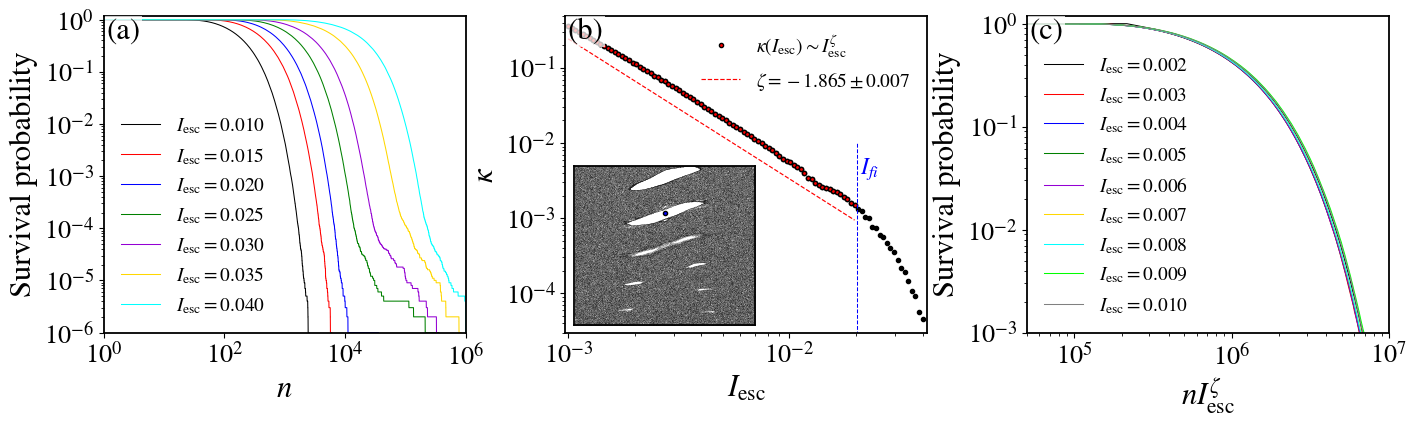

In [44]:
fontsize, _, _ = plot_params(fontsize=22, legend_fontsize=14)
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
I_escs = np.arange(0.01, 0.045, 0.005)
#I_escs = [0.01]
beta = 1e-3
nic = int(1e6)
exponent = int(np.log10(nic))
base = int(nic/10**exponent)
colors = ["black", "red", "blue", "green", "darkviolet", "gold", "cyan", "grey"]
xbox = 0.00695
ybox = 0.9275
bbox = {'linewidth': 0.0, 'facecolor': "w", 'alpha': 0.75, 'pad': 1}
lw = 0.75
for i, I_esc in enumerate(I_escs):
    df = "%s/survival_probability_eps=%.5f_Iesc=%.10f_nic=%ie%i.dat" % (path, beta, I_esc, base, exponent)
    df = pd.read_csv(df, header=None, delim_whitespace=True)
    x = np.array(df[0])
    y = np.array(df[1])
    ax[0].plot(x, y, c=colors[i], lw=lw, label="$I_{\\mathrm{esc}} = %.3f$" % I_esc)
ax[0].set_xscale("log"), ax[0].set_yscale("log")
ax[0].set_xlabel("$n$"), ax[0].set_ylabel("Survival probability")
ax[0].legend(loc="lower left", ncol=1, frameon=False)
ax[0].set_xlim(1e0, 1e6), ax[0].set_ylim(1e-6, 1.2e0)
#

ms = 3
ax[1].plot(I_escs_a, -a, "ko", markersize=ms, markeredgecolor="k")
ax[1].plot(I_escs_a[n_fit], -a[n_fit], "ro", markersize=ms, markeredgecolor="k", label="$\\kappa(I_{\\mathrm{esc}}) \\sim I_{\\mathrm{esc}}^{\\zeta}$")
angle = (np.arctan(CA) % (2*np.pi))*180/np.pi
print(angle, 270 - angle)
x_new = np.logspace(x_fit.min(), x_fit.max(), 100)
y_new = (0.6*10**CL)*x_new**CA
#ax[1].plot(x_new, y_new, "r--", label="$\\kappa(I_{\\mathrm{esc}}) \\sim I_{\\mathrm{esc}}^{%.5f}$" % CA, lw=.85)
ax[1].plot(x_new, y_new, "r--", label="$\\zeta = %.3f \\pm %.3f$" % (CA, std[0]), lw=.85)
#ax[1].text(0.002, 0.25e-2, "$\\zeta = %.3f \\pm %.3f$" % (CA, std[0]), color="red", rotation=266 - angle, fontsize=fontsize - 5)

#Ifii = 0.015
print(Ifii)
ax[1].plot([Ifii, Ifii], [1e-5, 1e-2], "b--", lw=lw)
ax[1].text(Ifii + 0.5e-3, 4e-3, "$I_{fi}$", color="b", fontsize = fontsize - 5)
ax[1].set_xlim(0.97e-3,4.2e-2), ax[1].set_ylim(3e-5, 5e-1)
ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[1].legend(loc="upper right", frameon=False)
ax[1].set_xlabel("$I_{\\mathrm{esc}}$"), ax[1].set_ylabel("$\\kappa$")

ax_ins = ax[1].inset_axes([0.025, 0.025, 0.5, 0.5])
ax_ins.plot(u[:, 0], u[:, 1], "ko", markersize=0.1, markeredgewidth=0)
ax_ins.set_xlim(0, 1)
ax_ins.set_ylim(0.015, 0.0225)
ax_ins.set_xticks([])
ax_ins.set_yticks([])
#ax_ins.plot(0.5*np.ones_like(positive_root1), positive_root1[:, 0], "ro", markersize=5, markeredgecolor="k")
ax_ins.plot(0.5, positive_root1[-1, 0], "bo", markersize=3, markeredgecolor="k")


#
colors = ["black", "red", "blue", "green", "darkviolet", "gold", "cyan", "lime", "grey"]
I_escs = np.arange(0.002, 0.011, 0.001)
#I_escs = [0.002]
for i, I_esc in enumerate(I_escs):
    df = "%s/survival_probability_eps=%.5f_Iesc=%.10f_nic=%ie%i.dat" % (path, beta, I_esc, base, exponent)
    df = pd.read_csv(df, header=None, delim_whitespace=True)
    x = np.array(df[0])
    y = np.array(df[1])
    ax[2].plot(x*I_esc**CA, y, c=colors[i], lw=lw, label="$I_{\\mathrm{esc}} = %.3f$" % I_esc)
    #plt.plot(x_new, y_new, "--", c=colors[i], lw=lw)
ax[2].set_xscale("log"), ax[2].set_yscale("log")
ax[2].set_xlabel("$nI_{\\mathrm{esc}}^{\\zeta}$"), ax[2].set_ylabel("Survival probability")
ax[2].legend(loc="lower left", ncol=1, frameon=False)
ax[2].set_xlim(5e4, 1e7), ax[2].set_ylim(1e-3, 1.2e0)

[ax[j].text(xbox, ybox, "(%s)" % (ascii_lowercase[j]), transform=ax[j].transAxes, bbox=bbox) for j in range(ax.shape[0])]

plt.subplots_adjust(left=0.067, bottom=0.185, right=0.985, top=0.9775, wspace=0.275)
plt.savefig("Figures/fig4.png", dpi=600)

298.2031358926817 -28.2031358926817
0.02026073030486245


<Figure size 640x480 with 0 Axes>

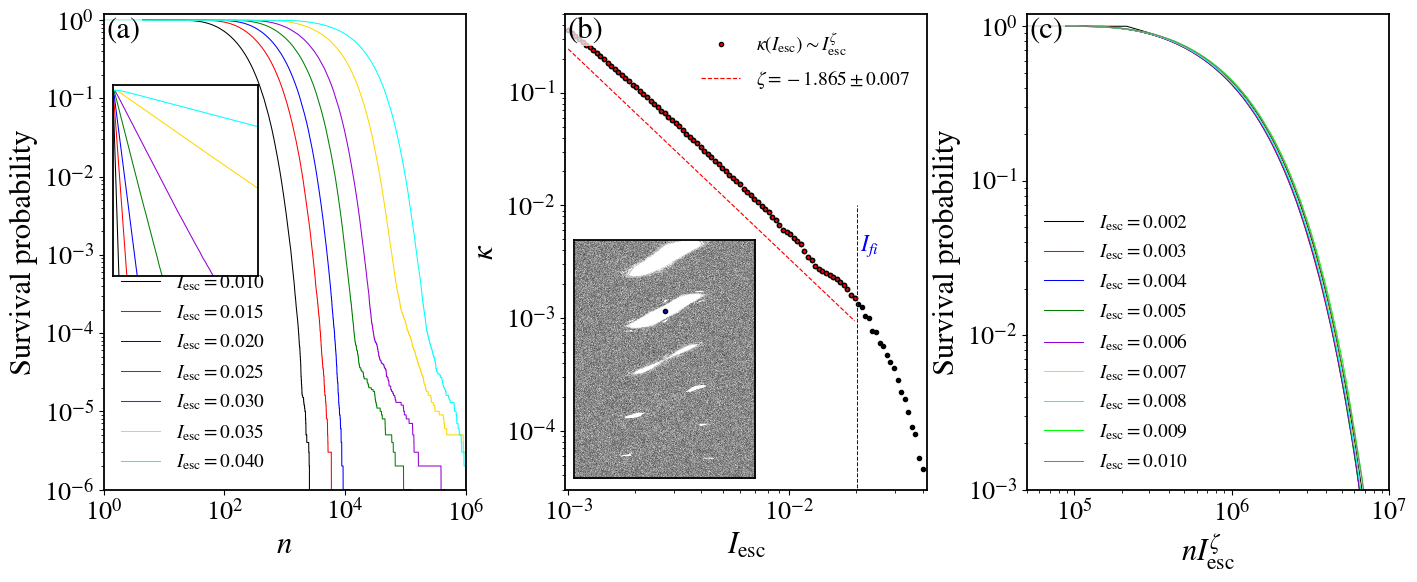

In [38]:
fontsize, _, _ = plot_params(fontsize=22, legend_fontsize=14)
fig, ax = plt.subplots(1, 3, figsize=(14, 6))
I_escs = np.arange(0.01, 0.045, 0.005)
#I_escs = [0.01]
beta = 1e-3
nic = int(1e6)
exponent = int(np.log10(nic))
base = int(nic/10**exponent)
colors = ["black", "red", "blue", "green", "darkviolet", "gold", "cyan", "grey"]
xbox = 0.00695
ybox = 0.951
bbox = {'linewidth': 0.0, 'facecolor': "w", 'alpha': 0.75, 'pad': 1}
lw = 0.75

ax_ins = ax[0].inset_axes([0.025, 0.45, 0.4, 0.4])
ax_ins.set_yscale("log")
for i, I_esc in enumerate(I_escs):
    df = "%s/survival_probability_eps=%.5f_Iesc=%.10f_nic=%ie%i.dat" % (path, beta, I_esc, base, exponent)
    df = pd.read_csv(df, header=None, delim_whitespace=True)
    x = np.array(df[0])
    y = np.array(df[1])
    ax[0].plot(x, y, c=colors[i], lw=lw, label="$I_{\\mathrm{esc}} = %.3f$" % I_esc)
    ax_ins.plot(x, y, c=colors[i], lw=lw, label="$I_{\\mathrm{esc}} = %.3f$" % I_esc)
ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].set_xlabel("$n$"), ax[0].set_ylabel("Survival probability")
ax[0].legend(loc="lower left", ncol=1, frameon=False)
ax[0].set_xlim(1e0, 1e6), ax[0].set_ylim(1e-6, 1.2e0)

ax_ins.set_xlim(0, 3e4)
ax_ins.set_ylim(1e-3, 1.2e0)

ax_ins.set_xticks([])
ax_ins.set_yticks([])
ax_ins.minorticks_off()


#

ms = 3
ax[1].plot(I_escs_a, -a, "ko", markersize=ms, markeredgecolor="k")
ax[1].plot(I_escs_a[n_fit], -a[n_fit], "ro", markersize=ms, markeredgecolor="k", label="$\\kappa(I_{\\mathrm{esc}}) \\sim I_{\\mathrm{esc}}^{\\zeta}$")
angle = (np.arctan(CA) % (2*np.pi))*180/np.pi
print(angle, 270 - angle)
x_new = np.logspace(x_fit.min(), x_fit.max(), 100)
y_new = (0.6*10**CL)*x_new**CA
#ax[1].plot(x_new, y_new, "r--", label="$\\kappa(I_{\\mathrm{esc}}) \\sim I_{\\mathrm{esc}}^{%.5f}$" % CA, lw=.85)
ax[1].plot(x_new, y_new, "r--", label="$\\zeta = %.3f \\pm %.3f$" % (CA, std[0]), lw=.85)
#ax[1].text(0.002, 0.25e-2, "$\\zeta = %.3f \\pm %.3f$" % (CA, std[0]), color="red", rotation=266 - angle, fontsize=fontsize - 5)

#Ifii = 0.015
print(Ifii)
ax[1].plot([Ifii, Ifii], [1e-5, 1e-2], "b--", lw=lw)
ax[1].text(Ifii + 0.5e-3, 4e-3, "$I_{fi}$", color="b", fontsize = fontsize - 5)
ax[1].set_xlim(0.97e-3,4.2e-2), ax[1].set_ylim(3e-5, 5e-1)
ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[1].legend(loc="upper right", frameon=False)
ax[1].set_xlabel("$I_{\\mathrm{esc}}$"), ax[1].set_ylabel("$\\kappa$")

ax_ins = ax[1].inset_axes([0.025, 0.025, 0.5, 0.5])
ax_ins.plot(u[:, 0], u[:, 1], "ko", markersize=0.1, markeredgewidth=0)
ax_ins.set_xlim(0, 1)
ax_ins.set_ylim(0.015, 0.0225)
ax_ins.set_xticks([])
ax_ins.set_yticks([])
#ax_ins.plot(0.5*np.ones_like(positive_root1), positive_root1[:, 0], "ro", markersize=5, markeredgecolor="k")
ax_ins.plot(0.5, positive_root1[-1, 0], "bo", markersize=3, markeredgecolor="k")


#
colors = ["black", "red", "blue", "green", "darkviolet", "gold", "cyan", "lime", "grey"]
I_escs = np.arange(0.002, 0.011, 0.001)
#I_escs = [0.002]
for i, I_esc in enumerate(I_escs):
    df = "%s/survival_probability_eps=%.5f_Iesc=%.10f_nic=%ie%i.dat" % (path, beta, I_esc, base, exponent)
    df = pd.read_csv(df, header=None, delim_whitespace=True)
    x = np.array(df[0])
    y = np.array(df[1])
    ax[2].plot(x*I_esc**CA, y, c=colors[i], lw=lw, label="$I_{\\mathrm{esc}} = %.3f$" % I_esc)
    #plt.plot(x_new, y_new, "--", c=colors[i], lw=lw)
ax[2].set_xscale("log"), ax[2].set_yscale("log")
ax[2].set_xlabel("$nI_{\\mathrm{esc}}^{\\zeta}$"), ax[2].set_ylabel("Survival probability")
ax[2].legend(loc="lower left", ncol=1, frameon=False)
ax[2].set_xlim(5e4, 1e7), ax[2].set_ylim(1e-3, 1.2e0)

[ax[j].text(xbox, ybox, "(%s)" % (ascii_lowercase[j]), transform=ax[j].transAxes, bbox=bbox) for j in range(ax.shape[0])]

plt.subplots_adjust(left=0.067, bottom=0.185, right=0.985, top=0.9775, wspace=0.275)
plt.savefig("Figures/fig4_v2.png", dpi=600)

<Figure size 640x480 with 0 Axes>

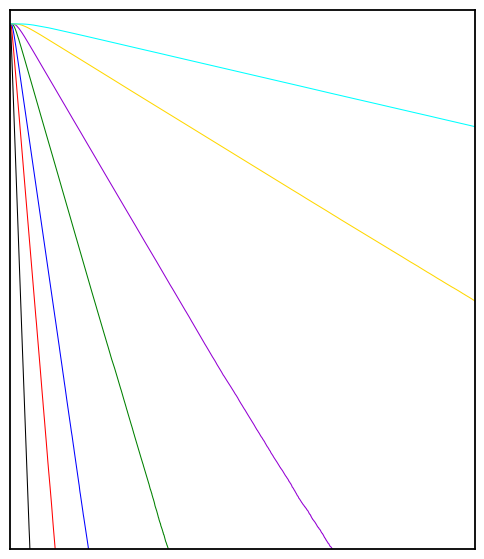

In [21]:
fontsize, _, _ = plot_params(fontsize=22, legend_fontsize=14)
fig, ax = plt.subplots(figsize=(6, 7))
I_escs = np.arange(0.01, 0.045, 0.005)
#I_escs = [0.01]
beta = 1e-3
nic = int(1e6)
exponent = int(np.log10(nic))
base = int(nic/10**exponent)
colors = ["black", "red", "blue", "green", "darkviolet", "gold", "cyan", "grey"]
xbox = 0.00695
ybox = 0.9275
bbox = {'linewidth': 0.0, 'facecolor': "w", 'alpha': 0.75, 'pad': 1}
lw = 0.75
for i, I_esc in enumerate(I_escs):
    df = "%s/survival_probability_eps=%.5f_Iesc=%.10f_nic=%ie%i.dat" % (path, beta, I_esc, base, exponent)
    df = pd.read_csv(df, header=None, delim_whitespace=True)
    x = np.array(df[0])
    y = np.array(df[1])
    ax.plot(x, y, c=colors[i], lw=lw, label="$I_{\\mathrm{esc}} = %.3f$" % I_esc)
#ax[0].set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(1e0, 3e4)
ax.set_ylim(1e-3, 1.2e0)
ax.set_xticks([])
ax.set_yticks([])
ax.minorticks_off()

plt.savefig("Figures/fig4_v2.png", dpi=600, bbox_inches="tight")

# Fig 9

In [4]:
def div_errors(a, da, b, db):
    max = (a + da)/(b - db)
    min = (a - da)/(b + db)

    return a/b, (max - min)/2

def sub_errors(a, da, b, db):
    max = (a + da) - (b - db)
    min = (a - da) - (b + db)

    return a - b, (max - min)/2

a = 14.2
da = 0.2
b = 5.3
db = 0.1
print(sub_errors(a, da, b, db))
print(div_errors(a, da, b, db))

(8.899999999999999, 0.29999999999999893)
(2.6792452830188678, 0.08831908831908786)


## Find $\gamma$

In [55]:
N = int(1e6)
eN = int(np.log10(N))
bN = int(N/10**eN)
n_ic = int(1e4)
en_ic = int(np.log10(n_ic))
bn_ic = int(n_ic/10**en_ic)
I0 = np.ones(20)*1e-7

df = "%s/Irms/Isat_vs_beta_I0=1e-7_nic=1e4_N=1e8.dat" % path
df = pd.read_csv(df, header=None, delim_whitespace=True)
xsat = np.array(df[0])
ysat = np.array(df[1])

cfs, cov = np.polyfit(np.log10(xsat), np.log10(ysat), 1, cov=True)

In [56]:
gamma, bsat = cfs
std_gamma = np.sqrt(np.diag(cov)[0])

In [57]:
gamma, std_gamma

(0.7235564783960868, 0.008166966841779236)

## Find $\beta$

In [58]:
N = int(1e6)
eN = int(np.log10(N))
bN = int(N/10**eN)
n_ic = int(1e4)
en_ic = int(np.log10(n_ic))
bn_ic = int(n_ic/10**en_ic)
I0 = np.ones(20)*1e-7

step = 1
eps = np.logspace(-4, -2, 20)
i_fit_ini = np.ones_like(eps, dtype=np.int32)*10
i_fit_end = [1500, 1500, 1500, 1500, 1500, 1100, 1000,
             150, 150, 150, 100, 100, 100, 100, 100, 100,
             100, 100, 100, 100]
coeffs = np.zeros((eps.shape[0], 2))
nx = np.zeros_like(eps)
iexc = 3
for i in range(len(eps)):
    eeps = int(np.log10(eps[i]))
    beps = int(eps[i]/10**eeps)
    eI0 = int(np.floor(np.log10(I0[i])))
    bI0 = int(I0[i]/10**eI0)
    df = "%s/Irms_beta=%.5f_I0=%ie%i_nic=%ie%i_N=%ie%i.dat" % (path, eps[i], bI0, eI0, bn_ic, en_ic, bN, eN)
    df = pd.read_csv(df, header=None, delim_whitespace=True)
    time = np.array(df[0])[::step]
    Irms = np.array(df[1])[::step]
    aux_time = time[i_fit_ini[i]:i_fit_end[i]]
    aux_Irms = Irms[i_fit_ini[i]:i_fit_end[i]]
    x_fit = time[i_fit_ini[i]:i_fit_end[i]]
    y_fit = Irms[i_fit_ini[i]:i_fit_end[i]]
    popt, _ = curve_fit(func, x_fit, y_fit)
    coeffs[i, :] = popt
    print(eps[i], coeffs[i, 0])
    nx[i] = (ysat[i]/(coeffs[i, 1]))**(1/coeffs[i, 0])

9.999999999999999e-05 0.4883044458778724
0.00012742749857031334 0.48530847766105895
0.00016237767391887208 0.47665106795330536
0.000206913808111479 0.4695510736248707
0.0002636650898730358 0.4640323601235873
0.0003359818286283781 0.46680333064876506
0.00042813323987193956 0.4591062289194185
0.000545559478116852 0.48273577074399304
0.0006951927961775606 0.48356531417269166
0.0008858667904100822 0.4820060717621676
0.0011288378916846883 0.4750892441348274
0.001438449888287663 0.4841440769330088
0.0018329807108324356 0.4729738175831465
0.002335721469090121 0.4682271658504998
0.002976351441631319 0.47016140330597883
0.00379269019073225 0.4721790170408077
0.004832930238571752 0.47024040905413456
0.00615848211066026 0.46851094851259406
0.007847599703514606 0.44606940885457036
0.01 0.43534418586779555


In [59]:
beta = coeffs[:-3, 0].mean()
std_beta = coeffs[:-3, 0].std()

In [60]:
beta, std_beta

(0.47476936914059614, 0.008134119566621436)

In [61]:
angle = (np.arctan(beta) % (2*np.pi))*180/np.pi

## Find $\alpha$

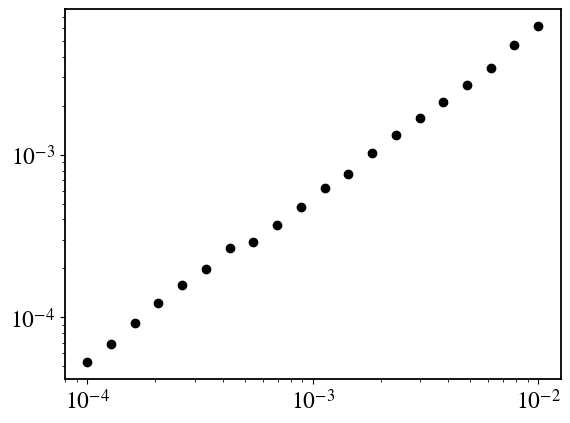

In [62]:
plot_params()
plt.plot(eps, coeffs[:,1], "ko")
cfs, cov = np.polyfit(np.log10(eps), np.log10(coeffs[:, 1]), 1, cov=True)
plt.xscale("log")
plt.yscale("log")

In [63]:
alphabeta = cfs[0]
std_alphabeta = np.sqrt(np.diag(cov)[0])
alphabeta, std_alphabeta

(1.0062565481906747, 0.008220218619775345)

In [64]:
alpha, std_alpha = div_errors(alphabeta, std_alphabeta, beta, std_beta)
alpha, std_alpha

(2.119463919949491, 0.05364218670583498)

## Find $z$

In [65]:
eps_fit = eps[:-3]
nx_fit = nx[:-3]
cfs, cov = np.polyfit(np.log10(eps_fit), np.log10(nx_fit), 1, cov=True)

In [66]:
z = cfs[0]
std_z = np.sqrt(np.diag(cov)[0])

In [67]:
z, std_z

(-0.5884895003713868, 0.015447680330351985)

In [68]:
gamma/beta - alpha

-0.5954471542810724

In [69]:
print(alpha, std_alpha)
print(beta, std_beta)
print(gamma, std_gamma)
print(z, std_z)

2.119463919949491 0.05364218670583498
0.47476936914059614 0.008134119566621436
0.7235564783960868 0.008166966841779236
-0.5884895003713868 0.015447680330351985


In [70]:
aux1, daux1 = div_errors(gamma, std_gamma, beta, std_beta)
aux1, daux1

(1.5240167656684185, 0.04332532929452548)

In [71]:
sub_errors(aux1, daux1, alpha, std_alpha)

(-0.5954471542810724, 0.09696751600036069)

## Plot

In [75]:
N = int(1e8)
eN = int(np.log10(N))
bN = int(N/10**eN)
n_ic = int(1e4)
en_ic = int(np.log10(n_ic))
bn_ic = int(n_ic/10**en_ic)
I0 = 1e-7

fontsize, _, _ = plot_params(fontsize=15, legend_fontsize=10, axes_linewidth=1.)
fig, ax = plt.subplots(2, 2, figsize=(9, 5))
colors = ["b", "g", "gold", "darkviolet"]
lw = 0.75
xbox = 0.0065
ybox = 0.905
bbox = {'linewidth': 0.0, 'facecolor': 'w', 'alpha': 0.75, 'pad': 1}

eps = np.logspace(-4, -2, 20)
ax[0, 0].plot([0], [0], "ko", markersize=0, label="$I_{\\mathrm{rms}} = Bn^\\beta$")
#label="$I_{\\mathrm{rms}} \\sim (n\\varepsilon^{\\alpha})^{\\beta}$"
ax[0, 0].plot(eps, coeffs[:, 1], "ro", markersize=4, markeredgecolor="k", label="$B(\\varepsilon) \\sim \\varepsilon^{\\alpha\\beta}$", zorder=1)
cfs = np.polyfit(np.log10(eps), np.log10(coeffs[:, 1]), 1)
x_new = np.logspace(np.log10(eps.min()), np.log10(eps.max()), 1000)
y_new = (10**cfs[1])*x_new**cfs[0]
ax[0, 0].plot(x_new, y_new, "k", lw=lw, label="$\\alpha\\beta = %.3f \pm %.3f$" % (alphabeta, std_alphabeta), zorder=0)

ax[0, 0].set_xscale("log")
ax[0, 0].set_yscale("log")
ax[0, 0].set_xlabel("$\\varepsilon$")
ax[0, 0].set_ylabel("$B$")
ax[0, 0].legend(loc="lower right", frameon=False)
ax[0, 0].set_xlim(1e-4 - 6e-6, 1e-2 + 6e-4)

ax[0, 1].plot(xsat, ysat, "ro", markersize=4, markeredgecolor="k", label="$I_{\\mathrm{rms, sat}}(\\varepsilon) \\sim \\varepsilon^\\gamma$", zorder=1)
x_new = np.logspace(np.log10(xsat.min()), np.log10(xsat.max()), 1000)
y_new = (10**bsat)*x_new**gamma
ax[0, 1].plot(x_new, y_new, "k", lw=lw, label="$\\gamma = %.3f \pm %.3f$" % (gamma, std_gamma), zorder=0)
ax[0, 1].legend(loc="lower right", frameon=False)
ax[0, 1].set_xscale("log")
ax[0, 1].set_yscale("log")
ax[0, 1].set_xlabel("$\\varepsilon$")
ax[0, 1].set_ylabel("$I_{\\mathrm{rms, sat}}$")
ax[0, 1].set_xlim(1e-4 - 6e-6, 1e-2 + 6e-4)

ax[1, 0].plot(eps, nx, "ro", markersize=4, markeredgecolor="k", label="$n_x(\\varepsilon) \\sim \\varepsilon^z$", zorder=1)
eps_fit = eps[:-3]
nx_fit = nx[:-3]
Z, bnx = np.polyfit(np.log10(eps_fit), np.log10(nx_fit), 1)
x_new = np.logspace(np.log10(eps_fit.min()), np.log10(eps_fit.max()), 1000)
y_new = (10**bnx)*x_new**Z
ax[1, 0].plot(x_new, y_new, "k", lw=lw, label="$z = %.2f \pm %.2f$" % (z, std_z), zorder=0)
ax[1, 0].set_xscale("log")
ax[1, 0].set_yscale("log")
ax[1, 0].legend(loc="lower left", frameon=False)
ax[1, 0].set_xlabel("$\\varepsilon$")
ax[1, 0].set_ylabel("$n_x$")
ax[1, 0].set_xlim(1e-4 - 6e-6, 1e-2 + 6e-4)


eps2 = np.array([eps[0], eps[7], eps[13], eps[16]])
xsi_min = 100000
xsi_max = -100000
for i in range(len(eps2)):
    eeps = int(np.floor(np.log10(eps2[i])))
    beps = float(eps2[i]/10**eeps)
    eI0 = int(np.floor(np.log10(I0)))
    bI0 = int(I0/10**eI0)
    df = "%s/Irms/Irms_beta=%.5f_I0=%ie%i_nic=%ie%i_N=%ie%i_reduced.dat" % (path, eps2[i], bI0, eI0, bn_ic, en_ic, bN, eN)
    df = pd.read_csv(df, header=None, delim_whitespace=True)
    time = np.array(df[0])
    Irms = np.array(df[1])
    print(eps2[i], eeps, beps)
    xSI = time/eps2[i]**(z)
    ySI = Irms/eps2[i]**gamma
    if xSI.max() > xsi_max:
        xsi_max = xSI.max()
    if xSI.min() < xsi_min:
        xsi_min = xSI.min()
    ax[1, 1].plot(xSI, ySI, lw=0.75, c=colors[i], label="$\\varepsilon = %.2f\\times10^{%i}$" % (beps, eeps))
ax[1, 1].set_xscale("log")
ax[1, 1].set_yscale("log")
ax[1, 1].set_xlabel("$n/\\varepsilon^z$")
ax[1, 1].set_ylabel("$I_{\\mathrm{rms}}/\\varepsilon^{\\gamma}$")
ax[1, 1].set_xlim(xsi_min, xsi_max)
x_new = np.logspace(np.log10(2e-2), np.log10(1.5e1), 1000)
y_new = 3e-1*x_new**beta
ax[1, 1].plot(x_new, y_new, "k", lw=lw)
ax[1, 1].text(0.15, 0.1, "$\\beta = %.3f \pm %.3f$" % (beta, std_beta), rotation=69 - angle, fontsize=fontsize - 5, transform=ax[1, 1].transAxes)
ax[1, 1].legend(loc="lower right", frameon=False)

for i in range(4):
    ax[int(i / 2), i % 2].text(xbox, ybox, "(%s)" % ascii_lowercase[i], bbox=bbox, transform=ax[int(i / 2), i % 2].transAxes, fontsize=fontsize)

plt.tight_layout(h_pad=0., w_pad=-0.1)
plt.savefig("Figures/fig8.png", dpi=500, bbox_inches="tight")
plt.close()

9.999999999999999e-05 -4 0.9999999999999999
0.000545559478116852 -4 5.45559478116852
0.002335721469090121 -3 2.335721469090121
0.004832930238571752 -3 4.832930238571752


<Figure size 640x480 with 0 Axes>

# Fig 7

In [2]:
#
epss = np.array([1e-3, 2e-3, 3e-3])
I0s_rec = np.array([-0.01, 0.01])
N_rec = int(1e9)
eN_rec = int(np.log10(N_rec))
bN_rec = int(N_rec/10**eN_rec)
#
I0s_Imed = 1e-10
N_Imed = int(1e7)
eN_Imed = int(np.log10(N_Imed))
bN_Imed = int(N_Imed/10**eN_Imed)
n_ic = int(1e6)
en_ic = int(np.log10(n_ic))
bn_ic = int(n_ic/10**en_ic)

In [3]:
nm = 10
ms = np.arange(0, nm + 1)
ym = np.zeros((epss.shape[0], I0s_rec.shape[0], ms.shape[0]))
fm = np.zeros((2, 3))
for i, eps in enumerate(epss):
    for j, I0 in enumerate(I0s_rec):
        Irec = int(-np.sign(I0))
        df = "%s/recurrence_times_eps=%.5f_I0=%.5f_Irec=%i_N=%ie%i.dat" % (path, eps, I0, Irec,  bN_rec, eN_rec)
        df = pd.read_csv(df, header=None, delim_whitespace=True)
        rts = np.array(df[0])
        print(eps, Irec, rts.mean())
        fm[j, i] = rts.mean()
        ym[i, j, :] = return_moments(rts, ms)

0.001 1 131.57468641935472
0.001 -1 151.00823468310253
0.002 1 101.71621042517096
0.002 -1 132.63921473083346
0.003 1 82.87252044499816
0.003 -1 120.69087610236454


In [4]:
for i in range(3):
    print("$%.3f$ & $%.2f$ & $%.2f$ & $%.2f$ \\\\" % (epss[i], fm[0, i], fm[1, i], fm[1, i] - fm[0, i]))

$0.001$ & $131.57$ & $151.01$ & $19.43$ \\
$0.002$ & $101.72$ & $132.64$ & $30.92$ \\
$0.003$ & $82.87$ & $120.69$ & $37.82$ \\


In [5]:
for i in range(ms.shape[0]):
    print(i, ym[0, 0, i] - ym[0, 1, i])

0 0.0
1 0.0
2 -90.68054469565053
3 -1968823.5821786332
4 -50523099156.836685
5 -1178674325373870.0
6 -2.629700964952101e+19
7 -5.749984542972437e+23
8 -1.2452025567988188e+28
9 -2.6836134494616007e+32
10 -5.76928228281079e+36


0.001 -0.01 (3520466,)
0.001 0.01 (3540877,)
0.002 -0.01 (4200334,)
0.002 0.01 (4256324,)
0.003 -0.01 (5008560,)
0.003 0.01 (4858987,)


<Figure size 640x480 with 0 Axes>

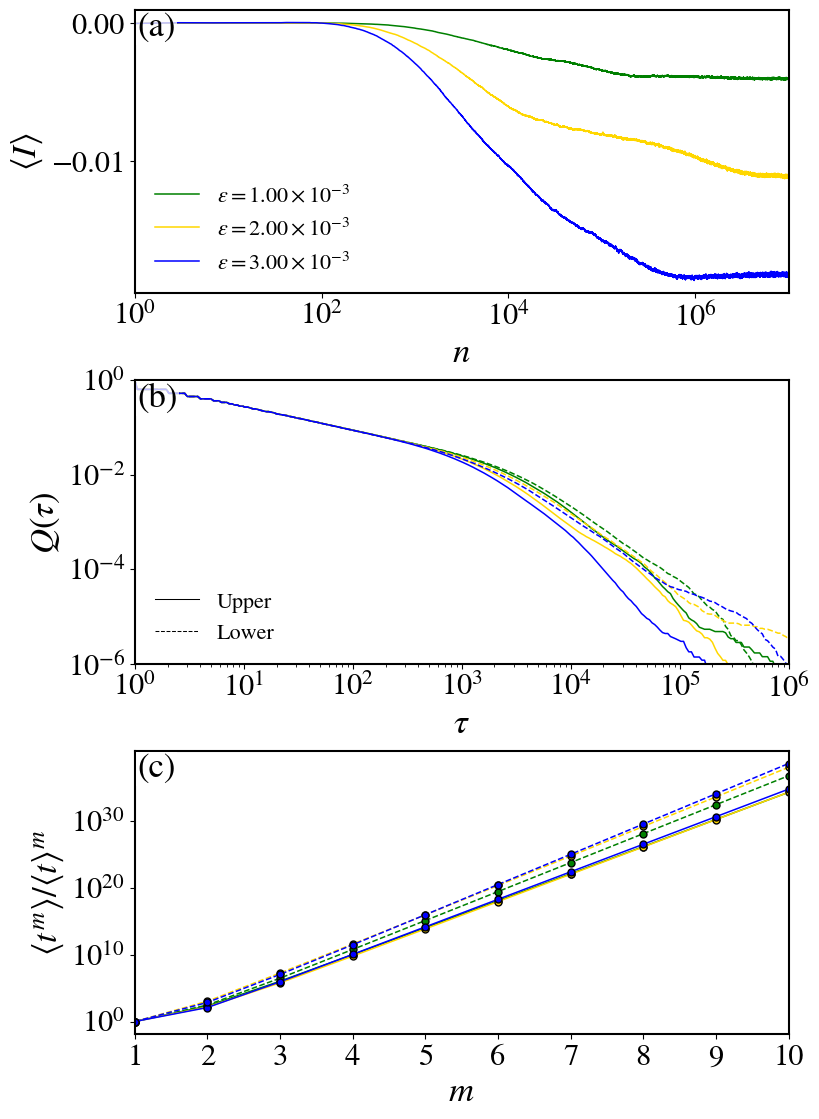

In [6]:
plot_params(fontsize=25, legend_fontsize=16, axes_linewidth=1.5)
fig, ax = plt.subplots(3, 1, figsize=(8, 11))
colors = ["green", "gold", "blue"]
style = ["-", "--"]
style2 = ["-o", "--o"]
lw = 1.1
xbox = 0.0036
ybox = 0.9078
bbox = {'linewidth': 0.0, 'facecolor': "w", 'alpha': 0.75, 'pad': 1}
for i, eps in enumerate(epss):
    eeps = int(np.floor(np.log10(eps)))
    beps = float(eps/10**eeps)
    eI0 = int(np.floor(np.log10(I0s_Imed)))
    bI0 = int(I0s_Imed/10**eI0)
    df = "%s/Imean_eps=%s_I0=%ie%i_nic=%ie%i_N=%ie%i.dat" % (path, format_number(eps, 7), bI0, eI0, bn_ic, en_ic, bN_Imed, eN_Imed)
    df = pd.read_csv(df, header=None, delim_whitespace=True)
    x = np.array(df[0])
    y = np.array(df[1])
    ax[0].plot(x, y, c=colors[i], lw=lw, label="$\\varepsilon = %.2f\\times10^{%i}$" % (beps, eeps), zorder=1)
    #
    for j, I0 in enumerate(I0s_rec):
        Irec = -np.sign(I0)
        df = "%s/recurrence_times_eps=%.5f_I0=%.5f_Irec=%i_N=%ie%i.dat" % (path, eps, I0, Irec,  bN_rec, eN_rec)
        df = pd.read_csv(df, header=None, delim_whitespace=True)
        rts = np.array(df[0])
        print(eps, I0, rts.shape)
        t, Q = cumul_rtd(rts)
        ax[1].plot(t, Q, style[j], c=colors[i], lw=lw)    
    
        ax[2].plot(ms, ym[i, j], "%s" % style2[j], c=colors[i], lw=lw, markersize=5, markeredgecolor="k")

ax[0].legend(loc="lower left", frameon=False)
ax[0].set_xscale("log")
ax[0].set_xlabel("$n$")
ax[0].set_ylabel("$\\langle I \\rangle$")
ax[0].set_xlim(1e0, x.max())
##
label = ["Upper", "Lower"]
for i, I0 in enumerate(I0s_rec):
    ax[1].plot([0], [0], style[i], c="k", lw=0.75, label=label[i])
ax[1].legend(loc="lower left", frameon=False)
ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[1].set_xlabel("$\\tau$")
ax[1].set_ylabel("$Q(\\tau)$")
ax[1].set_xlim(1e0, 1e6)
ax[1].set_ylim(1e-6, 1e0)
#
ax[2].set_ylabel("$\\langle t^m \\rangle/\\langle t \\rangle^m$")
ax[2].set_xlabel("$m$")
ax[2].set_yscale("log")
ax[2].set_xlim(1, 10)
ax[2].set_xticks(ms[1:])
ax[2].set_yticks([1e0, 1e10, 1e20, 1e30])
#plt.legend(loc="lower left", frameon=False)
#plt.yscale("log")
for i in range(ax.shape[0]):
    ax[i].text(xbox, ybox, "(%s)" % ascii_lowercase[i], transform=ax[i].transAxes, bbox=bbox)
plt.tight_layout(pad=0, h_pad=0, w_pad=0)
plt.savefig("Figures/fig7.png", dpi=500, bbox_inches="tight")